<a href="https://colab.research.google.com/github/SadFill/Iris-classification/blob/hyperparameters-tuning/Iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn import datasets, neighbors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [3]:
df = datasets.load_iris()
X = df.data[:, :2]
y = df.target

([], <a list of 0 Text major ticklabel objects>)

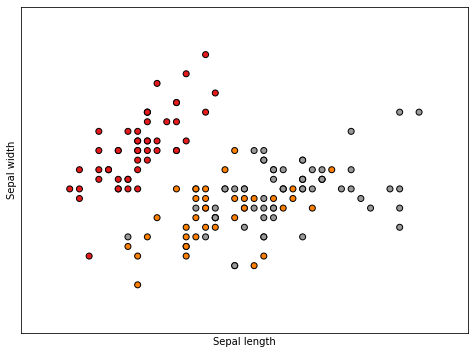

In [4]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())


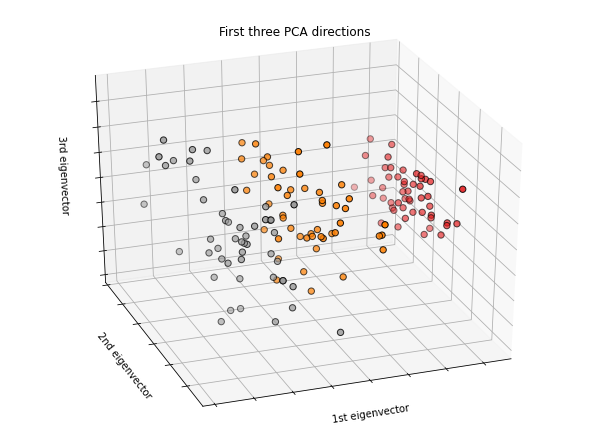

In [5]:

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(df.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [6]:
print(df.feature_names)
print(df.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [7]:
n_neighbors = 3
clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
print(type(df))
df.keys()

<class 'sklearn.utils.Bunch'>


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

Automatically created module for IPython interactive environment


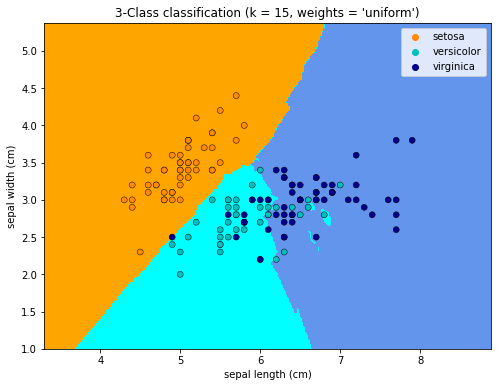

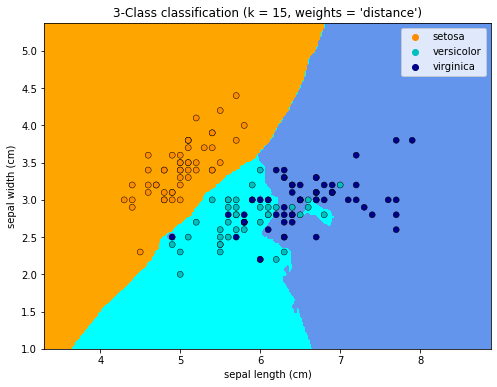

In [9]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()

Ниже сделаем всё по-новой, добавим пайплайн предобработки и испытаем
классификатор на разных параметрах 

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer, MaxAbsScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 

In [11]:
train = df.data[:, :2]
test = df.target
x_train, x_test, y_train, y_test = train_test_split(train, test, test_size=1/3, random_state=0)

In [12]:
x_train.shape, y_train.shape

((100, 2), (100,))

In [13]:
pipe = Pipeline([
                 ("scaler",StandardScaler()),
                 ("selector", VarianceThreshold()),
                 ("classifier", neighbors.KNeighborsClassifier())
], verbose=True) # shows time of each step execution 


In [14]:
pipe

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selector', VarianceThreshold(threshold=0.0)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=True)

In [15]:
pipe.fit(x_train, y_train)

[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] .......... (step 2 of 3) Processing selector, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('selector', VarianceThreshold(threshold=0.0)),
                ('classifier',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=True)

In [16]:
print('Training set score: ' + str(pipe.score(x_train,y_train)))
print('Test set score: ' + str(pipe.score(x_test,y_test)))

Training set score: 0.84
Test set score: 0.72


In [17]:
parameters = {'scaler': [StandardScaler(), MinMaxScaler(),
	Normalizer(), MaxAbsScaler()],
  #'classsifier__weights': ['uniform', 'distance'], 
  'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
  'classifier__metric': ['euclidean', 'manhattan', 'chebyshev',
                         'minkowski'],
	'classifier__n_neighbors': [1, 3, 5, 7, 10],
	'classifier__p': [1, 2],
	'classifier__leaf_size': [1, 5, 10, 15]
}

In [18]:
grid = GridSearchCV(pipe, parameters, cv=3).fit(x_train, y_train)

print('Training set score: ' + str(grid.score(x_train, y_train)))
print('Test set score: ' + str(grid.score(x_test, y_test)))

Выходные данные были обрезаны до нескольких последних строк (5000).
[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] .......... (step 2 of 3) Processing selector, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] .......... (step 2 of 3) Processing selector, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] .......... (step 2 of 3) Processing selector, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline] .......... (step 2 of 3) Processing selector, total=   0.0s
[Pipeline] ........ (step 3 of 3) Processing classifier, total=   0.0s
[Pipeline] ............ (step 1 of 3) Processing scaler, total=   0.0s
[Pipeline

In [19]:
best_score = grid.best_score_
best_score

0.7917409387997624

In [20]:
best_params = grid.best_params_
print(best_params)

{'classifier__algorithm': 'brute', 'classifier__leaf_size': 1, 'classifier__metric': 'chebyshev', 'classifier__n_neighbors': 10, 'classifier__p': 1, 'scaler': MaxAbsScaler(copy=True)}


In [21]:
clf.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [22]:
best_parametrs = {'algorithm' : 'brute',
                  'leaf_size' : 1,
                  'metric' : 'chebyshev',
                  'n_neighbors' : 10,
                  'p' : 1
                  }

In [23]:
best_classifier = neighbors.KNeighborsClassifier(**best_parametrs)
best_classifier.fit(x_train, y_train)

best_classifier.score(x_test, y_test)


0.78

In [24]:
best_params.keys()

dict_keys(['classifier__algorithm', 'classifier__leaf_size', 'classifier__metric', 'classifier__n_neighbors', 'classifier__p', 'scaler'])

In [25]:
best_params.values()

dict_values(['brute', 1, 'chebyshev', 10, 1, MaxAbsScaler(copy=True)])

In [26]:
# результаты gridsearch

grid_scores = grid.cv_results_
grid_scores

{'mean_fit_time': array([0.00331132, 0.00275612, 0.00271018, ..., 0.00276494, 0.00266925,
        0.0032866 ]),
 'mean_score_time': array([0.00340033, 0.00332816, 0.00302482, ..., 0.00316469, 0.00322485,
        0.00295528]),
 'mean_test_score': array([0.69013666, 0.73024361, 0.68954248, ..., 0.7513369 , 0.59031491,
        0.7513369 ]),
 'param_classifier__algorithm': masked_array(data=['auto', 'auto', 'auto', ..., 'brute', 'brute', 'brute'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__leaf_size': masked_array(data=[1, 1, 1, ..., 15, 15, 15],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_classifier__metric': masked_array(data=['euclidean', 'euclidean', 'euclidean', ...,
                    'minkowski', 'minkowski', 'minkowski'],
              mask=[False, False, False, ..., False, False, False],
        fill_v

In [27]:
import seaborn as sns
import pandas as pd

def plot_cv_results(cv_results, param_x, param_z, metric='mean_test_score'):
    """
    cv_results - cv_results_ attribute of a GridSearchCV instance (or similar)
    param_x - name of grid search parameter to plot on x axis
    param_z - name of grid search parameter to plot by line color
    """
    cv_results = pd.DataFrame(cv_results)
    col_x = 'param_' + param_x
    col_z = 'param_' + param_z
    fig, ax = plt.subplots(1, 1, figsize=(11, 8))
    sns.pointplot(x=col_x, y=metric, hue=col_z, data=cv_results, ci=99, n_boot=64, ax=ax)
    ax.set_title("CV Grid Search Results")
    ax.set_xlabel(param_x)
    ax.set_ylabel(metric)
    ax.legend(title=param_z)
    return fig

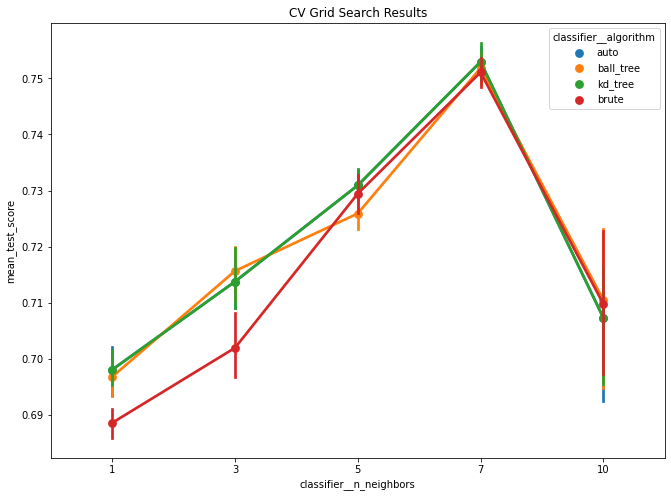

In [28]:
r = plot_cv_results(grid_scores, 'classifier__n_neighbors', 'classifier__algorithm')

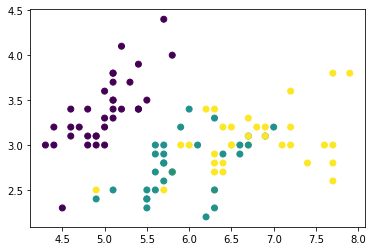

In [52]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train) # c - color, count of colors = count of labels in y_train

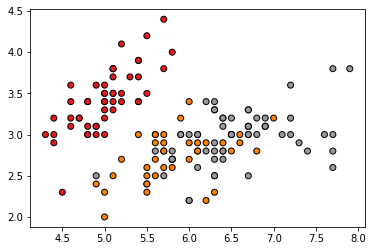

In [43]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')

In [51]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [53]:
??plt.scatter()